In [26]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [27]:
url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=samsung+smart+++tv&_sacat=0&_pgn="
response =  requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
product_d = []


products = soup.find_all( 'li', {'class': 's-item s-item__pl-on-bottom'})
for product in products:
    name = product.find("span", {'role': 'heading'})
    f_name =name.text.strip()

    if f_name =="Shop on eBay":
       continue


    price = product.find("span", {'class': 's-item__price'})
    unfiltered = price.text.strip()
    match = re.search(r'(\d+\.\d+)', unfiltered)
    if match:
      f_match = match.group(1) if match else 0.0

    rating = product.find("span",{"class": 's-item__seller-info-text'})
    f_rating = "N/A"
    if rating:
      unf_rating =rating.text.strip()
    r_match = re.search(r'(\d+(\.\d+)?)%', unf_rating)
    f_rating = r_match.group(1)
    img = product.find('img')
    if img:
      image = img.get('src')

    product_d.append({"name":f_name,
        "price(USD)": f_match,
        "rating": f_rating,
        "image": image})




In [28]:
df = pd.DataFrame(data= product_d)
df.to_csv('products.csv')

In [29]:
df.to_excel('products.xlsx')

In [30]:
df['price(USD)'] = pd.to_numeric(df['price(USD)'], errors='coerce').round(2)
df['price(NGN)'] = (df['price(USD)'] * 1488).round(0).astype(int)

pd.set_option('display.float_format', '{:.2f}'.format)

df.to_csv('products.csv', index=False)
df.to_excel('products.xlsx', index=False)
df

,name,price(USD),rating,image,price(NGN)
0,"Samsung 32 "" inch Class N5300 Series LED Full ...",239.99,98.9,https://i.ebayimg.com/thumbs/images/g/6ccAAOSw...,357105
1,Samsung 40 Inch Smart TV Full HD HDR LED UE40T...,526.40,97.4,https://i.ebayimg.com/thumbs/images/g/YHIAAOSw...,783283
2,"Samsung 32"" inch 1080p Full HD 60Hz LED Smart ...",188.31,98.8,https://i.ebayimg.com/thumbs/images/g/qgAAAOSw...,280205
3,"Samsung 40"" Smart TV",55.55,100,https://i.ebayimg.com/thumbs/images/g/kcoAAOSw...,82658
4,"QLED 65"" Q60D 2024, 4K, Smart TV",801.15,0,https://i.ebayimg.com/thumbs/images/g/9SgAAOSw...,1192111
...,...,...,...,...,...
69,Charging Dock Replacement for Switch & Charger...,30.22,98.5,https://i.ebayimg.com/thumbs/images/g/D~gAAOSw...,44967
70,"SAMSUNG GQ65QN800B Neo QLED TV (Flat, 65-Inch ...",912.08,99.3,https://i.ebayimg.com/thumbs/images/g/0j8AAOSw...,1357175
71,"Samsung UE32T4305AK, 81.3cm (32""), 1366 x 768 ...",277.72,100,https://i.ebayimg.com/thumbs/images/g/rjQAAOSw...,413247
72,REMOTE CONTROL for SAMSUNG AA59-00602A BN59-00...,8.53,98.9,https://i.ebayimg.com/thumbs/images/g/N5sAAOSw...,12693


<Axes: xlabel='price(NGN)'>

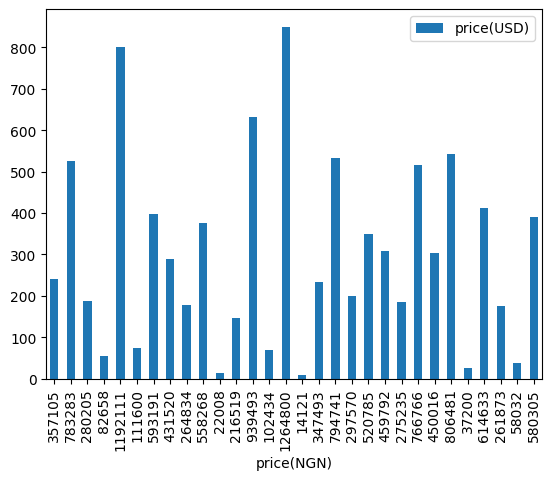

In [57]:
df_head = df.head(30)
df_head.plot.bar(x='price(NGN)', y='price(USD)')

In [32]:
averange_usd = df['price(USD)'].mean()
average_ngn = df['price(NGN)'].mean()

print(f"The average price in USD is ${averange_usd.round(1)}")
print(f'The average price in naira #{average_ngn.round(1)}')

The average price in USD is $325.7
The average price in naira #484646.4


<Axes: xlabel='rating'>

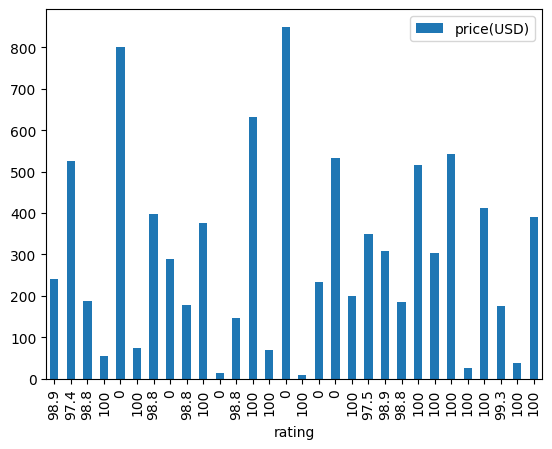

In [54]:
df_head = df.head(30)
df_head.plot.bar(x='rating', y='price(USD)')

In [43]:
df['rating'].describe()

count      74
unique     20
top       100
freq       33
Name: rating, dtype: object

<Axes: xlabel='rating'>

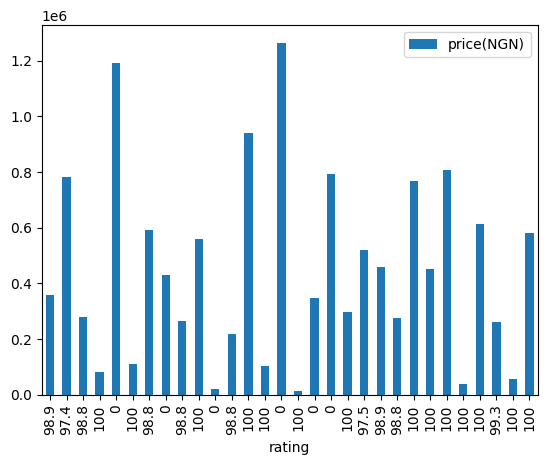

In [58]:
df_head.plot.bar(x='rating', y='price(NGN)')


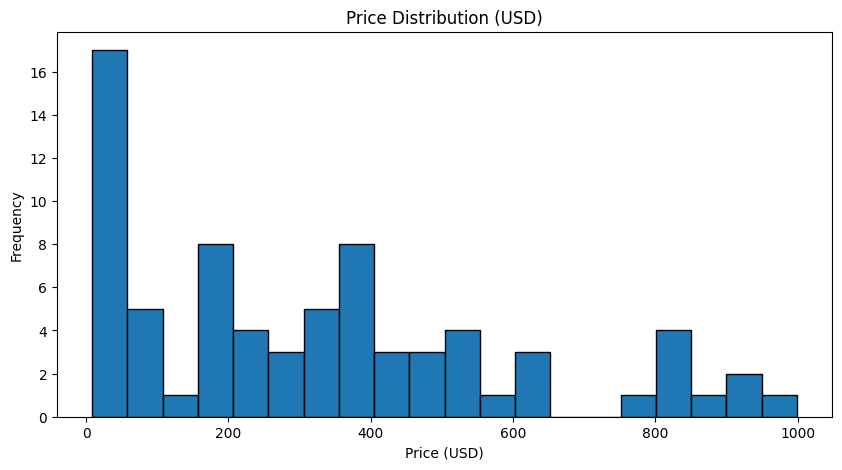

In [36]:
plt.figure(figsize=(10, 5))
df['price(USD)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()



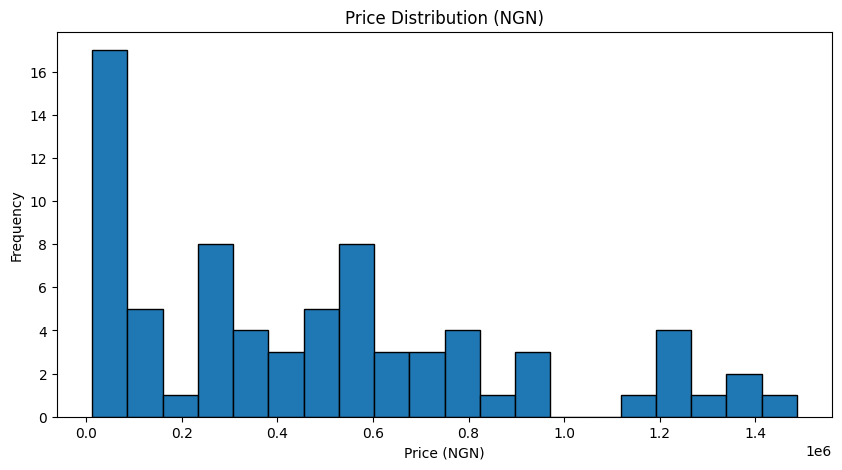

In [46]:
plt.figure(figsize=(10, 5))
df['price(NGN)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (NGN)')
plt.xlabel('Price (NGN)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

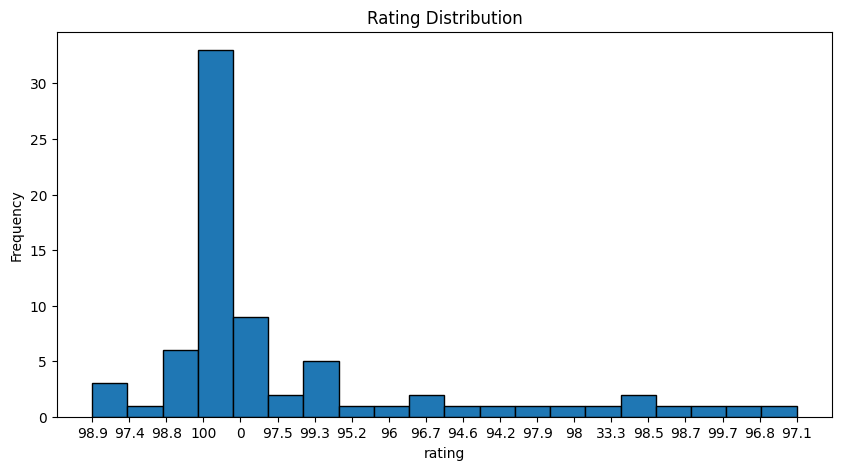

In [38]:
plt.figure(figsize=(10, 5))
df['rating'].hist(bins=20, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()